# Introduction
This is a copycat of the following [solution from Manav Sehgal](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions) for the Titanic Survival problem.

## Workflow stages
1. Understand question or problem definition
2. Acquire training and testing data
3. Wrangle prepare, cleanse the data
4. Analyze, identify patterns, explore the data
5. Model, predict and sovle the problem
6. Visualize, report and present the problem solving steps and final solution
7. Supply or submit the results

## 1. Question and problem definition
This is a problem that tries to predic the estimated survival rate of a passenger in the titanic crash based on a dataset contaning specific information about each passenger

We aim to classify the passengers in two broad categories: survived or not

#### Best practices
- Performing feature correlation analysis early in the project
- Using multiple plots instead of overlays for readability

In [1]:
# data analysis and wrangling modules
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## 2. Acquire the data
Let's work with both test and train datasets in order to guarantee all cleaning and wrangling operations are applied on both of them

In [2]:
train_df = pd.read_csv("./kaggle/input/train.csv")
test_df = pd.read_csv("./kaggle/input/test.csv")
combine = [train_df, test_df]

## 3. Analyse by describing data

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Categorical features
- Nominal, ordinal, ration and intervals
- Survived, Pclass, Sex and Embarked

#### Numerical features
- Continuous: Age, Fare
- Discrete: SibSp, Parch

#### Mixed data types features
- Cabin

#### High cardinality features
- Name, PassengerId, Cabin

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Which features contain blank, null or empty values?
#### Train data (~null rate): 
- Cabin (204/891) ~22%
- Age (714/891) ~15-20%
- Embarked (889/891) ~1%

#### Test data (~null rate):
- Age (332/418) ~25%
- Fare (417/418) ~1%
- Cabin (91/418) ~80%

In [6]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# include categorical featuers
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
test_df.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


### Finding correlations and patterns in data
- We can do that by pivoting some features based on assumptions to see if there are any correlations between predicted variable and predictor fatures
- This works better for low cardinality features such as ordinal, categorical and discrete values

#### Results

- **Pclass**: highly correlated with survival
- **Sex**: even more correlated with survival
- **Embarked**: slightly correlated with passengers that embarked on "C", may be correlated with Pclass or Sex, doesn't seem correlated
- **Parch and SibSp**: very low correlation on some values, seems randomic, maybe a simpler feature if has family would present better correlation

In [11]:
(
    train_df[["Pclass","Survived"]]
    .groupby(['Pclass'], as_index=False)
    .mean()
    .sort_values(by="Survived", ascending=False)
)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
(
    train_df[["Sex","Survived"]]
    .groupby(['Sex'], as_index=False)
    .mean()
    .sort_values(by="Survived", ascending=False)
)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
(
    train_df[["Embarked","Survived"]]
    .groupby(["Embarked"], as_index=False)
    .mean()
    .sort_values(by="Survived", ascending=False)
)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [14]:
(
    train_df[["Parch","Survived"]]
    .groupby(["Parch"], as_index=False)
    .mean()
    .sort_values(by="Survived", ascending=False)
)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [15]:
# Siblings and Spouses
(
    train_df[["SibSp","Survived"]]
    .groupby(["SibSp"], as_index=False)
    .mean()
    .sort_values(by="Survived", ascending=False)
)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### Analyze by visualizing data

Let's analyze the numerical variables and how they relate with survival rate.

It seems that being a small Infant has a much higher chance of survival


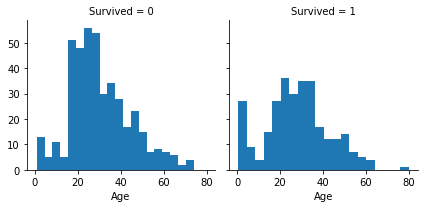

In [16]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins = 20)

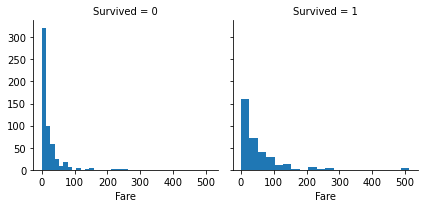

In [17]:
g.map(plt.hist,'Fare', bins=20)

#### Correlating numerical and ordinal features
let's see how Sex and Pclass behave, even Embarked

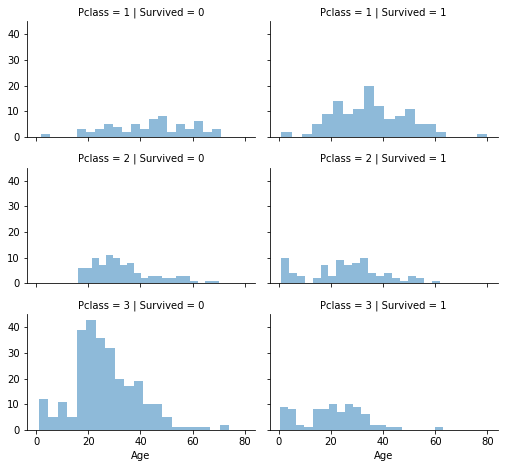

In [18]:
grid = sns.FacetGrid(train_df,row="Pclass", col="Survived", height=2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Correlating categorical features
Now we can correlate categorical features with our solution goal.

#### Observations
- Female passengers had much better survival rate than males. Confirms classifying (#1).
- Exception in Embarked = C, where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2)
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1)

#### Decisions
- Add Sex feature to model training
- Complete and add Embarked feature to model training.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


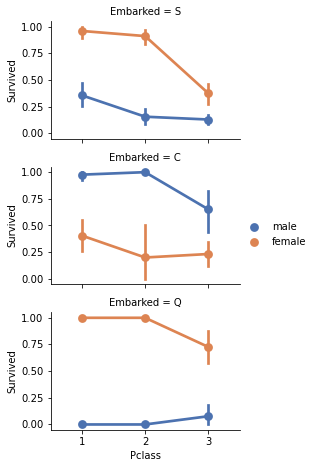

In [19]:
grid = sns.FacetGrid(train_df, row='Embarked',height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

### Correlating categorical and numerical features
We also may want to correlate categorical features and numeric features. We can consider correlating Embarked, Sex, Fare (numeric continuous), with Survived (Categorical numeric)

#### Observations
- Higher Fare paying passengers had better survival. COnfirms our assumptionfor creating (#4) fare ranges.
- Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2)

#### Decisions
- Consider banding Fare feature

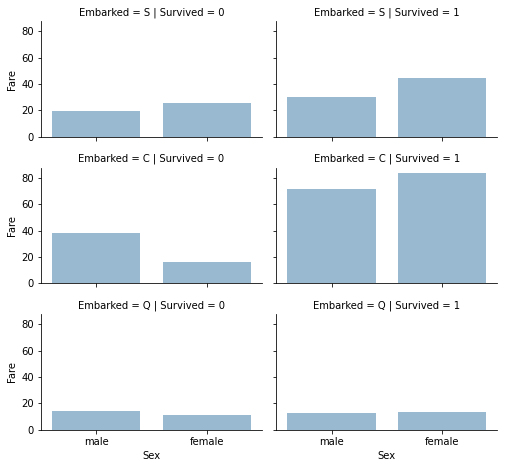

In [20]:
grid = sns.FacetGrid(train_df, row='Embarked', col = 'Survived', 
                     height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex','Fare', alpha=.5, ci=None, order= ['male','female'])
grid.add_legend()

## Wrangle data
We have collected several assumptions and decisisons regarding our dataset and solution requirements. So far we did nota have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating and completing goals

### Correcting by dropping features
This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.

Note that where applicable we perform operations on both training and testing datasets to stay consistent

In [21]:
print("Before", train_df.shape, test_df.shape,
      combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket','Cabin'], axis=1)
test_df = test_df.drop(['Ticket','Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape,
      combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


### Creating new feature extracting from existing
We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions, with the Regex pattern `(\w+\.)`, which matches the first word which ends with a dot character within Name feature. The `expand=False` flag returns a DataFrame.

#### Observations
When we plot Title, Age, and Survived, we note the following observations
- Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
- Survival among Title Age bands varies slightly
- Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

#### Decision
- We decide to retain the new Title featur efor model training

In [22]:
for dataset in combine:
    dataset['Title'] =  dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many title with a more common name or classify them as `Rare`.

In [23]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt',\
                        'Col','Don','Major','Rev','Sir', 'Jonkheer','Dona'],
                        'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    
train_df[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Dr,0.428571
1,Master,0.575000
2,Miss,0.702703
3,Mr,0.156673
4,Mrs,0.793651
5,Rare,0.312500


We can also replace categorical titles to ordinal

In [24]:
title_mapping = {"Mr": 1,"Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for ds in combine:
    ds['Title'] = ds['Title'].map(title_mapping)
    ds['Title'] = ds['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0


Now we can safely drop the Name feature from training and testing datasets. We also do not need the passengerId feature in the training dataset

In [25]:
train_df = train_df.drop(['Name','PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis = 1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where `female=1` and `male=0`.

In [26]:
for ds in combine:
    ds['Gender'] = ds['Sex'].map({'male':0, 'female':1}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Gender
0,0,3,male,22.0,1,0,7.2500,S,1.0,0
1,1,1,female,38.0,1,0,71.2833,C,3.0,1
2,1,3,female,26.0,0,0,7.9250,S,2.0,1
3,1,1,female,35.0,1,0,53.1000,S,3.0,1
4,0,3,male,35.0,0,0,8.0500,S,1.0,0


### Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete numerical continuous feature.

1. A simple way is to generate random nuumbers between mean and standard deviation.

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass = 1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and stndard deviation, based onsets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple exxecutions might vary. We will prefer method 2.

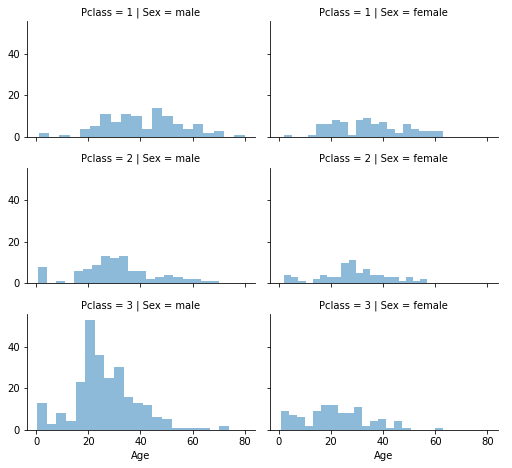

In [27]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', 
                     height=2.2, aspect= 1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Ae values based on Pclass x Gender combinations.

In [28]:
age_guess = np.zeros((2,3))
age_guess

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we calculate the age guess for each combination

In [29]:
age_guess_df = (
    train_df[['Gender','Pclass','Age']]
    .dropna(subset=['Age'])
    .groupby(['Gender','Pclass'], as_index=False)
    .median()
    .rename(columns={'Age': 'AgeGuess'})
    .sort_values(['Gender','Pclass'])
)
age_guess_df

,Gender,Pclass,AgeGuess
0,0,1,40.0
1,0,2,30.0
2,0,3,25.0
3,1,1,35.0
4,1,2,28.0
5,1,3,21.5


In [30]:
age_guess = (
    age_guess_df
    .pivot(index='Gender', columns='Pclass', values='AgeGuess')
    .to_numpy()
)

In [31]:
age_guess

array([[40. , 30. , 25. ],
       [35. , 28. , 21.5]])

In [32]:
print('Before', train_df['Age'].isnull().sum(), test_df['Age'].isnull().sum())

for ds in combine:
    for g in range(0,2):
        for p in range(0,3):
            ds.loc[(ds.Age.isnull()) & (ds.Gender == g) & (ds.Pclass == p+1), \
                   'Age'] = age_guess[g,p]
            
    ds['Age'] = ds['Age'].astype(int)

print('After', train_df['Age'].isnull().sum(), test_df['Age'].isnull().sum())

Before 177 86
After 0 0


Let us create Age bands and determine correlations with Survived

In [33]:
train_df['AgeBand'] = pd.cut(train_df['Age'],5)
train_df[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False) \
.mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands

In [34]:
for ds in combine:
    ds.loc[(ds['Age'] <= 16),'Age'] = 0
    ds.loc[(ds['Age'] > 16) & (ds['Age'] <= 32) ,'Age'] = 1
    ds.loc[(ds['Age'] > 32) & (ds['Age'] <= 48) ,'Age'] = 2
    ds.loc[(ds['Age'] > 48) & (ds['Age'] <= 64) ,'Age'] = 3
    ds.loc[(ds['Age'] > 64),'Age'] = 4

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Gender,AgeBand
0,0,3,male,1,1,0,7.2500,S,1.0,0,"(16.0, 32.0]"
1,1,1,female,2,1,0,71.2833,C,3.0,1,"(32.0, 48.0]"
2,1,3,female,1,0,0,7.9250,S,2.0,1,"(16.0, 32.0]"
3,1,1,female,2,1,0,53.1000,S,3.0,1,"(32.0, 48.0]"
4,0,3,male,2,0,0,8.0500,S,1.0,0,"(32.0, 48.0]"


In [35]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Gender
0,892,3,male,2,0,0,7.8292,Q,1.0,0
1,893,3,female,2,1,0,7.0000,S,3.0,1
2,894,2,male,3,0,0,9.6875,Q,1.0,0
3,895,3,male,1,0,0,8.6625,S,1.0,0
4,896,3,female,1,1,1,12.2875,S,3.0,1


In [36]:
train_df = train_df.drop(['Sex','AgeBand'], axis=1)
test_df = test_df.drop(['Sex'], axis=1)
combine = [train_df, test_df]

In [37]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Gender
0,0,3,1,1,0,7.2500,S,1.0,0
1,1,1,2,1,0,71.2833,C,3.0,1
2,1,3,1,0,0,7.9250,S,2.0,1
3,1,1,2,1,0,53.1000,S,3.0,1
4,0,3,2,0,0,8.0500,S,1.0,0


### Create new feature combining existing features

We can create a new feature FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [38]:
for ds in combine:
    ds['FamilySize'] = ds['SibSp'] + ds['Parch'] + 1

(
    train_df[['FamilySize','Survived']]
    .groupby(['FamilySize'], as_index=False)
    .mean()
    .sort_values(by='Survived', ascending=False)
)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone

In [39]:
for ds in combine:
    ds['IsAlone'] = 0
    ds.loc[ds['FamilySize'] == 1, 'IsAlone'] = 1
    
(
    train_df[['IsAlone','Survived']]
    .groupby(['IsAlone'], as_index = False)
    .mean()
    .sort_values(by='Survived', ascending=False)
)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp and Family Size features in favor of IsAlone

In [40]:
train_df = train_df.drop(['Parch','SibSp','FamilySize'], axis=1)
test_df = test_df.drop(['Parch','SibSp','FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Age,Fare,Embarked,Title,Gender,IsAlone
0,0,3,1,7.2500,S,1.0,0,0
1,1,1,2,71.2833,C,3.0,1,0
2,1,3,1,7.9250,S,2.0,1,1
3,1,1,2,53.1000,S,3.0,1,0
4,0,3,2,8.0500,S,1.0,0,1


We can also create an artificial feature combining Pclass and Age.

In [41]:
for ds in combine:
    ds['Age*Class'] = ds['Age'] * ds['Pclass']

(
    train_df[['Age*Class','Survived']]
    .groupby(['Age*Class'], as_index=False)
    .mean()
    .sort_values(by='Survived', ascending=False)
)

,Age*Class,Survived
1,1,0.728814
0,0,0.550000
2,2,0.520408
4,4,0.415094
3,3,0.277487
5,6,0.149425
7,9,0.111111
6,8,0.000000
8,12,0.000000


### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance

In [42]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [43]:
for ds in combine:
    ds['Embarked'] = ds['Embarked'].fillna(freq_port)
    
(
    train_df[['Embarked','Survived']]
    .groupby(['Embarked'], as_index=False)
    .mean()
    .sort_values(by='Survived', ascending=False)
)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting a categoricak feature to numeric

We can now conver the Embarked feature by creating a new numeric Port feature.

In [44]:
for ds in combine:
    ds['Embarked'] = ds['Embarked'].map({'S': 0, 'Q': 1, "C": 2}).astype(int)
    
train_df.head()

,Survived,Pclass,Age,Fare,Embarked,Title,Gender,IsAlone,Age*Class
0,0,3,1,7.2500,0,1.0,0,0,3
1,1,1,2,71.2833,2,3.0,1,0,2
2,1,3,1,7.9250,0,2.0,1,1,3
3,1,1,2,53.1000,0,3.0,1,0,2
4,0,3,2,8.0500,0,1.0,0,1,6


### Quick completing and converting a numeric feature

We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs the most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlatinon to guess missing feature as we are replacing only a single value. The completion goal achieves the desired requierement for model algorithm to operate on non-null values.

We may also wanto round off the fare to two decimals as it represents currency.

In [45]:
median_fare = test_df['Fare'].dropna().median()
test_df['Fare'] = test_df['Fare'].fillna(median_fare)
test_df.head()

,PassengerId,Pclass,Age,Fare,Embarked,Title,Gender,IsAlone,Age*Class
0,892,3,2,7.8292,1,1.0,0,1,6
1,893,3,2,7.0000,0,3.0,1,0,6
2,894,2,3,9.6875,1,1.0,0,1,6
3,895,3,1,8.6625,0,1.0,0,1,3
4,896,3,1,12.2875,0,3.0,1,0,3


We can now create the FareBand

In [46]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)

(
    train_df[['FareBand','Survived']]
    .groupby(['FareBand'], as_index=False)
    .mean()
    .sort_values(by='FareBand', ascending=True)
)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [47]:
def fare_mapper(fare):
    if fare <= 7.910:
        return 0
    if fare <= 14.454:
        return 1
    if fare <= 31.0:
        return 2
    else:
        return 3

In [48]:
for ds in combine:
    ds['Fare'] = ds['Fare'].map(fare_mapper)
    ds['Fare'] = ds['Fare'].astype(int)
    
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Age,Fare,Embarked,Title,Gender,IsAlone,Age*Class
0,0,3,1,0,0,1.0,0,0,3
1,1,1,2,3,2,3.0,1,0,2
2,1,3,1,1,0,2.0,1,1,3
3,1,1,2,3,0,3.0,1,0,2
4,0,3,2,1,0,1.0,0,1,6
5,0,3,1,1,1,1.0,0,1,3
6,0,1,3,3,0,1.0,0,1,3
7,0,3,0,2,0,4.0,0,0,0
8,1,3,1,1,0,3.0,1,0,3
9,1,2,0,2,2,3.0,1,0,0


In [49]:
test_df.head(10)

,PassengerId,Pclass,Age,Fare,Embarked,Title,Gender,IsAlone,Age*Class
0,892,3,2,0,1,1.0,0,1,6
1,893,3,2,0,0,3.0,1,0,6
2,894,2,3,1,1,1.0,0,1,6
3,895,3,1,1,0,1.0,0,1,3
4,896,3,1,1,0,3.0,1,0,3
5,897,3,0,1,0,1.0,0,1,0
6,898,3,1,0,1,2.0,1,1,3
7,899,2,1,2,0,1.0,0,0,2
8,900,3,1,0,2,3.0,1,1,3
9,901,3,1,2,0,1.0,0,0,3


## Model, Predict and Solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requiremente to narrow down to a select few models which we can evaluate.

Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). 

We are also performing a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [50]:
X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship betwwen the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)

In [52]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.37

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positive coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely, as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived
- So is Title as second highest positive correlation

In [55]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by="Correlation", ascending=False)

,Feature,Correlation
5,Gender,2.170983
4,Title,0.471333
3,Embarked,0.290088
6,IsAlone,0.243787
7,Age*Class,-0.040352
2,Fare,-0.098233
1,Age,-0.474080
0,Pclass,-1.208396


Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://www.wikiwand.com/en/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [57]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.38

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its nighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k=1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://www.wikiwand.com/en/K-nearest_neighbors_algorithm)

KNN confidence score is the better confidence level so far

In [62]:
# K Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100,2)
acc_knn

83.16

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes'theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem

The model generated confidence score is the lowest among the models evaluated so far.

In [63]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train)*100, 2)
acc_gaussian

76.09

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

In [64]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train)*100,2)
acc_perceptron

80.92

In [66]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100,2) 
acc_linear_svc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


80.02

In [67]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train)*100,2)
acc_sgd

78.23

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decisions trees where the target variable can take continuous values (typically real numbers) are called regressions trees.

THe model confidence score is the highest among models evaluated so far.

In [68]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100,2)
acc_decision_tree

86.64

The next model Random Forest is one of the most popular ones. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees (n_estimators = 100) at training time and outputting the class taht is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

The model confidence score is the highest among models evaluated so far. We decide to use this models'output (Y_pred) for creating our competition submission of results

In [75]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for deision trees' habit of overfitting to their training set.

In [77]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines','KNN','Logistic Regression',
              'Random Forest','Naive Bayes','Perceptron',
              'Stochastic Gradient Decent','Linear SVC',
              'Decision Tree'],
    'Score' : [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian,
               acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree]
})

models.sort_values(by="Score", ascending = False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,83.16
0,Support Vector Machines,82.38
2,Logistic Regression,81.37
5,Perceptron,80.92
7,Linear SVC,80.02
6,Stochastic Gradient Decent,78.23
4,Naive Bayes,76.09


In [78]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": Y_pred
})

In [80]:
submission.to_csv("./kaggle/output/gold_submission.csv", index=False)

In [81]:
!head -5 ./kaggle/output/gold_submission.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
